L'ACP, tout d'abord, permet d'étudier :

- la variabilité entre les individus, c'est-à-dire quelles sont les différences et les ressemblances entre les individus ;

- les liaisons entre les variables : y a-t-il des groupes de variables très corrélées entre elles qui peuvent être regroupées en de nouvelles variables synthétiques ?

C’est ici la clé de l’ACP : rechercher la projection pour laquelle l’inertie (l'étalement) des points est maximale.

Attention, vous allez être bluffé !
À ce stade, nous avons 2 espaces totalement différents : Rp et Rn . Le premier est à p dimensions et contient le nuage d’individus NI , et l’autre est à n dimensions et contient le nuage des variables NK

Dans chacun des 2 espaces, on a cherché les axes principaux d’inertie.
Dans Rp
, nous avons vu que l’on pouvait considérer les axes principaux comme de nouvelles variables calculables à partir des variables initiales.
Et bien, figurez-vous que, si l'on place ces nouvelles variables dans Rn , alors celles-ci coïncident exactement avec les axes principaux d’inertie du nuage des variables NK!

Autrement dit, étudier les axes d’inertie des individus est équivalent à étudier les axes principaux d’inertie des variables !

Ce résultat est très important en ACP. Il nous dit que, quand on analyse un échantillon, étudier les individus ou étudier les variables, c’est en fait étudier deux facettes d’une même chose !
Il y a donc une dualité.

Résumons où nous en sommes.
Nous avons 2 espaces :

1. l'espace Rp à p dimensions où l'on a placé le nuage NI des individus;

2. l'espace Rn à n dimensions où l'on a placé le nuage NK des variables.

Pour ces 2 objectifs, nous allons créer 2 graphiques. Chacun d’eux sera à 2 dimensions :

1. Pour l'objectif 1, ce sera la projection du nuage des individus NI sur les 2 premiers axes d’inertie, c’est-à-dire sur le premier plan factoriel.

Le second s’appelle le cercle des corrélations.

2. Pour l'objectif 2, ce sera la projection du nuage des variables NK sur le premier plan factoriel.

In [99]:
import pandas as pd

In [100]:
features = pd.read_csv('data/dengue_features_train.csv')
labels = pd.read_csv('data/dengue_labels_train.csv')
features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [101]:
X = features.copy()
y = labels.copy()
X['week_start_date']= pd.to_datetime(X['week_start_date'], format='%Y-%m-%d')
X['total_cases'] = y['total_cases']

In [102]:
#Split week_start_date
X["day"]= X.week_start_date.dt.day
X["month"]= X.week_start_date.dt.month
X = X.drop(['week_start_date'], axis=1)
X = X.fillna(X.mean()) 

In [123]:
#Dataframe "sj" San Juan
X_sj = X[X['city']=='sj']
X_iq = X[X['city']=='iq']

X_sj = X_sj.drop(['city'], axis=1)
X_iq = X_iq.drop(['city'], axis=1)

# WARNING : date vs normalisation ( peut etre renmplacer par le 'weekofyear')
#X_sj = X_sj.drop(['week_start_date'], axis=1)
#X_iq = X_iq.drop(['week_start_date'], axis=1)

y_sj = X_sj['total_cases']
y_iq = X_iq['total_cases']

n_comp= X_sj.shape[1]
#X_sj = X_sj.drop(['total_cases'], axis=1)

In [104]:
#Standardisation des features
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_sj)
X_sj_scale = std_scale.transform(X_sj) #contient nos données normalisés
X_sj_scale = pd.DataFrame(X_sj_scale, columns=X_sj.columns, index=X_sj.index)
X_sj_scale.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,day,month
0,-1.694458,-0.566356,0.468023,0.361866,0.358160,0.196080,-0.521642,-1.288463,-1.263290,-1.723746,...,-1.633792,0.182230,-1.109610,0.159988,-1.292713,-1.730294,-0.371698,-0.587697,1.681124,-0.700879
1,-1.694458,-0.499751,0.934477,0.784091,-0.279299,-0.201193,-0.287295,-0.770289,-0.686721,-0.740981,...,-0.759279,-0.300855,-0.208043,-0.469775,0.050596,-0.264762,-0.624836,-0.568225,-0.945999,-0.411117
2,-1.694458,-0.433146,-0.422975,1.122218,-0.370297,0.074484,-0.023204,-0.307757,-0.327837,0.207077,...,0.189640,-0.435045,-0.208043,-0.333610,0.342619,0.134929,0.497181,-0.587697,-0.146439,-0.411117
3,-1.694458,-0.366541,0.527521,1.913958,0.871177,1.242063,-0.455394,-0.140828,-0.039552,0.127616,...,0.076652,-0.193503,0.328845,0.006802,0.985072,0.468005,-0.782192,-0.607170,0.653120,-0.411117
4,-1.694458,-0.299936,1.193838,2.102101,1.288364,1.447679,-0.632056,0.290404,0.319332,0.454595,...,0.422047,0.906857,1.372231,3.104559,1.977952,0.867695,-0.720618,-0.548752,1.452679,-0.411117


In [125]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=n_comp)
X_sj_projected = pca.fit_transform(X_sj_scale)
pd.DataFrame(X_sj_projected, index=X_sj.index, columns=["F"+str(i+1) for i in range(n_comp)])

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25
0,4.528523,0.048011,-1.127137,0.146452,-0.135188,0.284841,-1.786428,0.006487,-0.676789,-0.048901,...,0.279029,0.122681,-0.276744,0.041409,0.181344,-0.253403,0.023864,0.044038,0.015635,-2.104497e-17
1,1.880771,-0.212802,-1.384038,0.588721,-1.009414,-0.383433,0.832115,0.717568,-0.303040,-0.408198,...,0.047649,0.546627,0.018064,0.076318,-0.057417,-0.060233,-0.054552,0.003240,-0.015731,2.595006e-18
2,0.236262,0.800821,-1.287186,0.686652,-0.657137,-1.126366,0.420468,-0.322073,-0.517377,-0.187100,...,-0.108736,0.031745,-0.465572,0.175703,-0.156373,0.374567,0.030417,0.006563,0.019710,1.199060e-17
3,0.056504,-1.284844,-2.655465,0.252271,0.218265,-1.438142,-0.472766,-0.076670,-0.510531,-0.153785,...,-0.067056,0.413724,-0.060356,0.103076,-0.108310,0.292424,-0.076537,-0.005756,-0.000980,-5.732328e-18
4,-1.243304,-3.246479,-3.472892,2.092893,0.930632,-0.869573,-1.317799,-0.625455,-1.174349,0.374040,...,0.138339,-0.634165,0.063744,-0.019896,-0.069318,0.070040,0.001340,-0.014658,0.013774,5.266054e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,5.361452,-0.337266,0.453258,-2.050524,3.114948,-0.013663,-0.978851,-0.327266,0.103176,0.417311,...,0.004237,0.241530,0.025060,-0.071622,0.107158,-0.064179,0.119992,-0.018807,-0.021070,-5.655394e-18
932,3.092385,-0.522192,2.996354,0.566442,-1.173274,0.197483,1.365941,0.409278,0.087138,-0.240003,...,0.599306,-0.472729,-0.267603,0.051650,0.042345,-0.092767,-0.013554,0.015537,0.003276,-7.861529e-19
933,4.131572,1.490305,3.030015,-1.043932,-0.330776,-0.102308,0.868972,-0.542965,-0.081096,0.032961,...,0.010417,-0.139191,-0.000543,0.097322,-0.043660,0.079847,0.005527,0.006888,-0.007363,-1.025534e-18
934,4.528227,-0.789410,1.081045,-1.169793,0.838961,0.218105,-0.170392,0.791519,0.192342,-0.039362,...,-0.062300,-0.478498,-0.105915,0.131342,-0.043150,-0.082665,0.026282,0.040982,0.012512,-2.461180e-17


In [126]:

f12 = pca.components_[0:n_comp,:]
f12 = pd.DataFrame(f12, index=["F"+str(i+1) for i in range(n_comp)],columns=X_sj.columns)
# F1 est une combinaison linéaire des autres variables. Ici,
f12

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,day,month
F1,-6.091093e-03,-2.195202e-01,1.451813e-02,4.872999e-03,2.686892e-02,3.283131e-02,-0.141871,-3.064665e-01,-3.042013e-01,-3.200538e-01,...,-3.208606e-01,-1.060815e-02,-2.975324e-01,4.961959e-03,-2.449298e-01,-2.893357e-01,-9.252604e-02,-8.377923e-02,1.993878e-03,-2.211850e-01
F2,-2.512915e-02,4.415462e-02,-6.383215e-02,-6.858223e-02,-1.607392e-01,-1.712854e-01,0.368808,-1.415014e-01,-1.541940e-01,1.981022e-02,...,2.061120e-02,-2.746389e-01,-1.562313e-01,-2.805117e-01,-1.887087e-01,-6.908658e-02,3.731851e-01,-7.029761e-03,6.718914e-02,4.375118e-02
F3,4.827750e-01,-5.611785e-02,-4.327789e-01,-4.912352e-01,-2.746417e-01,-2.891337e-01,-0.020861,9.719562e-02,1.005585e-01,-5.666401e-03,...,-7.929702e-03,1.716875e-01,-5.089981e-02,-1.321015e-01,-9.756577e-02,-3.114340e-03,1.672134e-02,-1.846837e-01,-1.979141e-02,-5.421167e-02
F4,-1.597833e-01,-3.010306e-01,7.263511e-02,1.244409e-01,-3.871579e-01,-3.266105e-01,0.184721,-5.229648e-02,-4.023617e-02,-3.519151e-03,...,-5.528191e-03,2.908503e-01,1.086853e-01,4.526237e-01,3.114068e-01,-4.555040e-02,3.044181e-02,-9.856647e-02,1.916662e-02,-3.158464e-01
F5,2.945448e-01,-1.879731e-01,-4.314764e-03,-3.262412e-02,4.681751e-01,4.716865e-01,0.321639,3.587104e-02,4.605917e-02,8.344456e-03,...,1.511985e-02,3.074493e-01,-4.451409e-02,4.289305e-02,2.733409e-02,-7.805377e-02,1.515945e-01,-1.541790e-01,8.341228e-02,-2.133309e-01
F6,1.068072e-02,4.118323e-01,-2.219612e-02,-2.037396e-02,-3.565598e-02,-5.661344e-02,0.165013,-3.101952e-02,-2.946863e-02,-1.466249e-01,...,-1.342168e-01,3.418712e-01,-1.295965e-01,2.366229e-01,5.661680e-03,-2.175554e-01,1.304987e-01,4.522264e-01,-1.669111e-01,3.884347e-01
F7,-9.012882e-03,-1.331584e-01,-4.465777e-02,-3.069600e-02,5.651095e-02,4.919193e-02,-0.000020,-6.371827e-03,-6.995871e-03,4.843235e-02,...,4.623838e-02,-5.643327e-02,3.226157e-03,-6.627105e-03,-5.169259e-03,-1.419484e-02,4.376113e-02,-1.997512e-02,-9.692785e-01,-9.138687e-02
F8,2.524006e-01,1.001354e-01,5.712837e-01,3.769075e-01,-1.157138e-01,-2.260912e-01,0.045133,7.066221e-02,7.062577e-02,-3.851241e-02,...,-3.197978e-02,1.588104e-01,-3.909115e-02,-2.751361e-01,-1.521996e-01,5.414859e-02,1.054945e-01,-3.938615e-01,-1.116463e-01,1.134127e-01
F9,2.236720e-01,-3.187561e-01,2.112195e-01,8.250749e-02,-7.705865e-02,-7.645657e-02,-0.032058,4.355806e-02,4.597436e-02,3.093487e-02,...,3.171068e-02,6.781733e-02,-1.895162e-03,-3.093969e-01,-8.345293e-02,9.699785e-02,4.519308e-02,7.445680e-01,3.380619e-02,-3.098845e-01
F10,1.134604e-01,7.725556e-02,7.699149e-02,-7.560701e-02,4.229781e-02,1.568860e-02,-0.364851,-8.705378e-02,-7.769957e-02,4.645844e-02,...,5.150714e-02,4.285480e-01,-3.366522e-03,-3.601556e-02,4.116504e-02,-5.043414e-03,2.051587e-01,-5.724021e-02,3.012474e-02,2.975960e-02


In [127]:
for var in X_sj.columns:
    print('-'*20)
    print(var)
    idx = f12[var].abs().idxmax(axis = 0)
    maxi= f12[var].loc[idx]
    print(idx,' : ',maxi )
    

--------------------
year
F15  :  -0.5480412130039991
--------------------
weekofyear
F19  :  0.532927027201286
--------------------
ndvi_ne
F8  :  0.5712836867687175
--------------------
ndvi_nw
F12  :  -0.5406650108307404
--------------------
ndvi_se
F16  :  0.692340968257347
--------------------
ndvi_sw
F16  :  -0.6737962318496836
--------------------
precipitation_amt_mm
F25  :  0.7071067811865478
--------------------
reanalysis_air_temp_k
F24  :  0.6136329286863622
--------------------
reanalysis_avg_temp_k
F22  :  -0.7669752826882037
--------------------
reanalysis_dew_point_temp_k
F24  :  -0.7103015454036141
--------------------
reanalysis_max_air_temp_k
F18  :  0.6448010882148656
--------------------
reanalysis_min_air_temp_k
F19  :  0.4679154590186709
--------------------
reanalysis_precip_amt_kg_per_m2
F10  :  0.5642115241256906
--------------------
reanalysis_relative_humidity_percent
F14  :  -0.4454997738090462
--------------------
reanalysis_sat_precip_amt_mm
F25  :  -0.70

In [129]:
f12.loc['F9'].sort_values(ascending=False)

total_cases                              0.744568
year                                     0.223672
ndvi_ne                                  0.211220
station_min_temp_c                       0.096998
ndvi_nw                                  0.082507
reanalysis_max_air_temp_k                0.070261
reanalysis_tdtr_k                        0.067817
reanalysis_avg_temp_k                    0.045974
station_precip_mm                        0.045193
reanalysis_air_temp_k                    0.043558
day                                      0.033806
reanalysis_specific_humidity_g_per_kg    0.031711
reanalysis_dew_point_temp_k              0.030935
reanalysis_min_air_temp_k                0.022464
station_avg_temp_c                      -0.001895
reanalysis_relative_humidity_percent    -0.007773
precipitation_amt_mm                    -0.032058
reanalysis_sat_precip_amt_mm            -0.032058
reanalysis_precip_amt_kg_per_m2         -0.036507
ndvi_sw                                 -0.076457


In [130]:
#cercle de correlation des variable => signification des composants
#analyse du nuage de points
#nombre de variable(max) = nbre de composant
#cmb de composant a analyser? 
##soit qd on arrive plus a analyser la signification du composant 
##soit critère de Kaiser. >(100/p)%

### PCA graphique

In [131]:
X_sj.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,day,month
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,30,4
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,7,5
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,14,5
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,21,5
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,28,5


In [132]:
X_sj_scale

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,day,month
0,-1.694458,-0.566356,0.468023,0.361866,0.358160,0.196080,-0.521642,-1.288463,-1.263290,-1.723746,...,-1.633792,0.182230,-1.109610,0.159988,-1.292713,-1.730294,-0.371698,-0.587697,1.681124,-0.700879
1,-1.694458,-0.499751,0.934477,0.784091,-0.279299,-0.201193,-0.287295,-0.770289,-0.686721,-0.740981,...,-0.759279,-0.300855,-0.208043,-0.469775,0.050596,-0.264762,-0.624836,-0.568225,-0.945999,-0.411117
2,-1.694458,-0.433146,-0.422975,1.122218,-0.370297,0.074484,-0.023204,-0.307757,-0.327837,0.207077,...,0.189640,-0.435045,-0.208043,-0.333610,0.342619,0.134929,0.497181,-0.587697,-0.146439,-0.411117
3,-1.694458,-0.366541,0.527521,1.913958,0.871177,1.242063,-0.455394,-0.140828,-0.039552,0.127616,...,0.076652,-0.193503,0.328845,0.006802,0.985072,0.468005,-0.782192,-0.607170,0.653120,-0.411117
4,-1.694458,-0.299936,1.193838,2.102101,1.288364,1.447679,-0.632056,0.290404,0.319332,0.454595,...,0.422047,0.906857,1.372231,3.104559,1.977952,0.867695,-0.720618,-0.548752,1.452679,-0.411117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1.760907,-0.899381,0.026715,-1.215298,2.334228,2.325532,-0.188824,-1.786931,-1.910459,-1.927423,...,-1.870792,0.665315,-1.393249,-1.167622,-0.942285,-0.997528,-0.857449,-0.587697,1.110011,-0.990642
932,1.760907,-0.832776,-1.115754,-0.962000,-1.037796,-1.800622,-0.715430,-0.875778,-0.863222,-1.198569,...,-1.215826,0.343258,-0.542332,0.057864,-0.591856,-0.264762,-0.901919,-0.607170,-1.631335,-0.700879
933,1.760907,-0.766171,-2.271536,-1.356406,-0.713374,-0.457378,-0.419341,-1.380042,-1.410374,-1.520069,...,-1.523559,-0.649750,-1.423639,-1.252725,-1.292713,-0.597837,0.131157,-0.646115,-0.831776,-0.700879
934,1.760907,-0.699566,-0.723261,0.656464,0.453740,0.774570,-0.801507,-1.242094,-1.233873,-1.813254,...,-1.733001,0.477448,-1.200780,-0.622961,-1.292713,-0.597837,-0.535895,-0.607170,-0.032217,-0.700879


In [133]:
X_sj_pca

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,weekofyear,month
0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,18,4
1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,19,5
2,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,20,5
3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,21,5
4,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,...,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4,13,3
932,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,...,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3,14,4
933,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,...,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1,15,4
934,0.001800,0.067469,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,...,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3,16,4


In [134]:
from functions import *

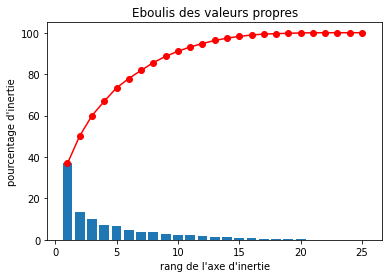

In [137]:
# Eboulis des valeurs propres
display_scree_plot(pca)


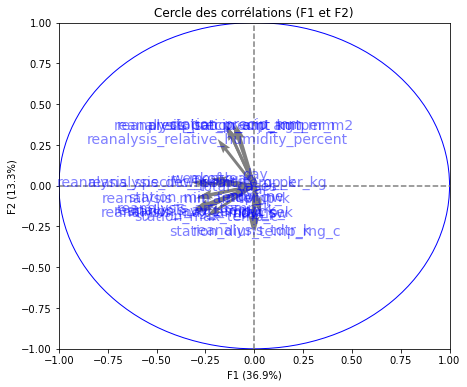

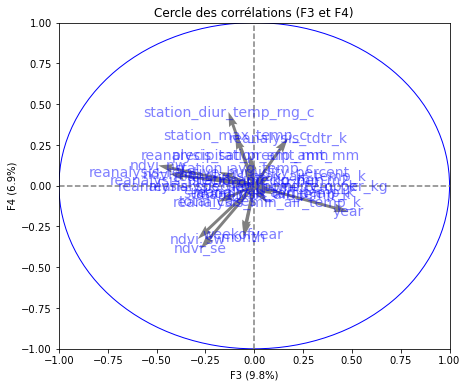

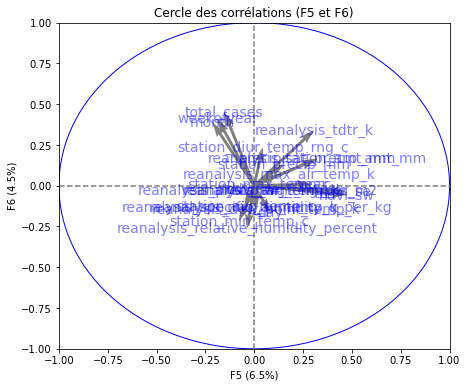

In [138]:
 # Cercle des corrélations
n_comp = X_sj.shape[1]
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(X_sj.columns))


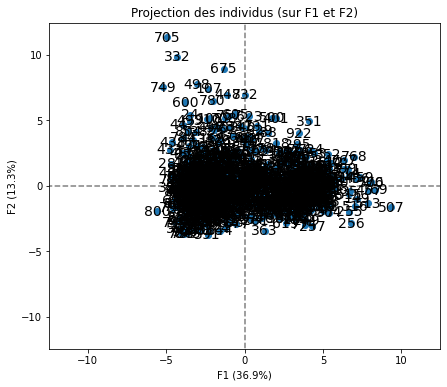

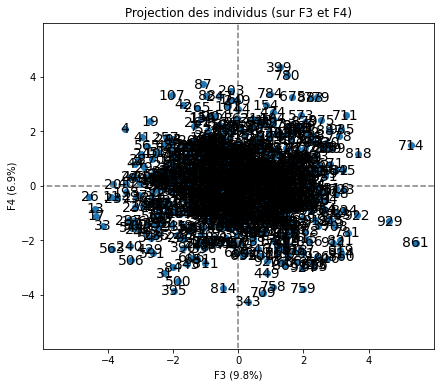

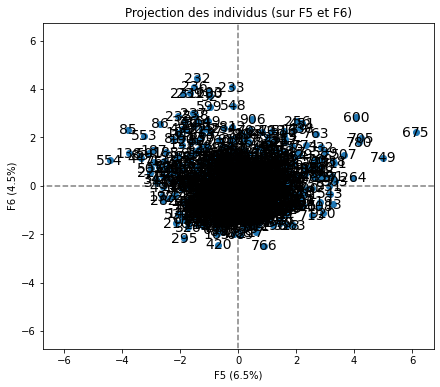

In [140]:
# Projection des individus
display_factorial_planes(X_sj_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(X_sj.index))